# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Dandiset Version: 0.250326.0015**

<div class="alert alert-info">
    <strong>Disclaimer:</strong> This notebook was AI-generated to assist in the exploration of the Dandiset. It has not been fully verified by human experts. Please exercise caution when interpreting the code or results, and verify critical findings independently.
</div>

## Overview of the Dandiset

This Dandiset, titled "Allen Institute Openscope - Vision2Hippocampus project," contains data from experiments investigating how neural representations of visual stimuli evolve from the thalamus through visual cortical areas to the hippocampus in mice. The study uses Neuropixels probes for extracellular electrophysiology recordings.

The experiments involved presenting mice with two main categories of visual stimuli:
1. Simple visual motion (e.g., bars of light with varying properties like width, speed, contrast).
2. Complex, naturalistic visual stimuli (e.g., movies involving eagles and squirrels).

Key data types include `ElectricalSeries` (raw electrophysiology), `LFP` (local field potentials), `ProcessingModule` outputs, and `Units` (spike-sorted neural data).

You can find more information and access the Dandiset at its DANDI Archive page:
[https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

## What this notebook covers

This notebook will guide you through the following steps:
1. Listing the required Python packages.
2. Demonstrating how to connect to the DANDI archive and retrieve basic information about the Dandiset using the DANDI API.
3. Showing how to load a specific NWB (Neurodata Without Borders) file from this Dandiset.
4. Displaying some of the metadata contained within the NWB file.
5. Providing a link to explore the NWB file interactively using Neurosift.
6. Illustrating how to access and visualize example data from the NWB file, including:
    - Pupil tracking data.
    - Running speed.
    - Spike times from sorted neural units (raster plot).
7. Summarizing the demonstrated analyses and suggesting potential future directions.

## Required Packages

To run this notebook, you will need the following Python packages installed. This notebook assumes they are already available in your Python environment.

- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for working with NWB files)
- `h5py` (dependency for NWB/HDF5 files)
- `remfile` (for streaming remote HDF5 files)
- `numpy` (for numerical operations)
- `pandas` (for data manipulation, especially with tabular NWB data)
- `matplotlib` (for plotting)
- `seaborn` (for enhanced plotting styles)

No `pip install` commands are included here.

## Connecting to DANDI and Loading Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a seaborn theme for aesthetics in plots
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000690"
version_id = "0.250326.0015"
dandiset = client.get_dandiset(dandiset_id, version_id)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset version: {metadata['version']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # Print first 200 chars of description

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Use asset.identifier for the UUID

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Dandiset version: 0.250326.0015
Dandiset description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippoca...

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents. For this demonstration, we will use the file:
`sub-692072/sub-692072_ses-1298465622.nwb`

Its asset ID is `fbcd4fe5-7107-41b2-b154-b67f783f23dc`.

The direct download URL for this asset, which we will use for streaming, is:
`https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/`

In [2]:
# Define the URL for the NWB file
nwb_file_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
asset_id = "fbcd4fe5-7107-41b2-b154-b67f783f23dc" # For Neurosift link

# Declare variables for file objects to be accessible for later cleanup
remote_nwb_file_obj = None
h5_file_obj = None
io_nwb = None
nwb = None

try:
    print(f"Attempting to load NWB file from: {nwb_file_url}")
    remote_nwb_file_obj = remfile.File(nwb_file_url)
    h5_file_obj = h5py.File(remote_nwb_file_obj, 'r')
    io_nwb = pynwb.NWBHDF5IO(file=h5_file_obj, mode='r', load_namespaces=True)
    nwb = io_nwb.read()
    print("NWB file loaded successfully!")
            
    # Display some basic metadata from the NWB file
    print(f"\n--- NWB File Metadata ---")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session Description: {nwb.session_description}")
    print(f"Session Start Time: {nwb.session_start_time}")
    print(f"Experimenter(s): {nwb.experimenter}")
    print(f"Institution: {nwb.institution}")
    if nwb.subject:
        print(f"Subject ID: {nwb.subject.subject_id}")
        print(f"Subject Species: {nwb.subject.species}")
        print(f"Subject Sex: {nwb.subject.sex}")
        print(f"Subject Age: {nwb.subject.age}")
    
    print(f"\n--- Exploring NWB File Structure ---")
    print(f"Top-level objects in NWB file: {list(nwb.children)[0:10]}...") # Show first 10
    if nwb.acquisition:
        print(f"Keys in nwb.acquisition: {list(nwb.acquisition.keys())}")
    if nwb.processing:
        print(f"Keys in nwb.processing: {list(nwb.processing.keys())}")
    if nwb.intervals:
        print(f"Keys in nwb.intervals: {list(nwb.intervals.keys())[:5]}...") # Show first 5
    if nwb.units:
        print(f"Units table present: True, Number of units: {len(nwb.units.id[:])}")


except Exception as e:
    print(f"An error occurred while loading the NWB file: {e}")
    # Clean up any partially opened resources if error occurs during opening
    if io_nwb:
        io_nwb.close()
    if h5_file_obj:
        h5_file_obj.close()
    if remote_nwb_file_obj:
        remote_nwb_file_obj.close()
    nwb = None # Ensure nwb is None if loading failed
    raise # Re-raise the exception to make it visible in notebook execution

Attempting to load NWB file from: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully!

--- NWB File Metadata ---
Identifier: 1298465622
Session Description: Data and metadata for an Ecephys session
Session Start Time: 2023-09-21 00:00:00-07:00
Experimenter(s): None
Institution: Allen Institute
Subject ID: 692072
Subject Species: Mus musculus
Subject Sex: M
Subject Age: P82D

--- Exploring NWB File Structure ---
Top-level objects in NWB file: [EyeTracking abc.EllipseEyeTracking at 0x140039297050384
Fields:
  corneal_reflection_tracking: corneal_reflection_tracking abc.EllipseSeries at 0x140039301669200
Fields:
  angle: <HDF5 dataset "angle": shape (485980,), type "<f8">
  area: <HDF5 dataset "area": shape (485980,), type "<f8">
  area_raw: <HDF5 dataset "area_raw": shape (485980,), type "<f8">
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (485980, 2), type "<f8">
  description: no description
  height: <HDF5 dataset "height": shape (485980,), type "<f8">
  interval: 1
  offset: 0.0
  reference_frame: nose
  re

### Summary of NWB File Contents

The loaded NWB file (`sub-692072/sub-692072_ses-1298465622.nwb`) contains various types of data. The cell above provides a direct glimpse into its top-level structure. Here's a conceptual summary of some key groups:

- **`acquisition`**: Raw acquired data, which can include:
    - `EyeTracking`: Data related to pupil position, corneal reflection, and blinks. Contains `EllipseSeries` for detailed tracking.
    - `raw_running_wheel_rotation`: Raw signals from the running wheel.
    - `running_wheel_signal_voltage`: Voltage signals related to the running wheel.
- **`processing`**: Processed data, often organized into modules:
    - `running`: Contains processed `TimeSeries` for `running_speed`, `running_speed_end_times`, and `running_wheel_rotation`.
    - `stimulus`: Information about stimulus presentations, often including `TimeSeries` of stimulus frame timestamps.
- **`intervals`**: Stores `TimeIntervals` tables defining epochs or events during the experiment. This NWB file contains many such tables related to different visual stimulus presentations, for example:
    - `Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`
    - `Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`
    - `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations` (and many variants with different parameters like width, velocity, contrast)
    - `natmovie_*_presentations` (for natural movie stimuli)
    - `invalid_times`: Intervals marked as invalid for analysis.
- **`units`**: Data about sorted spike units, typically a `Units` table including:
    - `spike_times`: A `VectorIndex` pointing to arrays of spike times for each unit.
    - `waveform_mean`: Mean spike waveforms.
    - Various quality metrics for each unit (e.g., `isi_violations`, `snr`, `presence_ratio`).
- **`electrodes`**: Information about the recording electrodes, such as their location, group, and impedance.
- **`electrode_groups`**: Defines groups of electrodes, often corresponding to probes.
- **`devices`**: Information about the recording devices (e.g., Neuropixels probes).
- **`subject`**: Metadata about the experimental subject (e.g., ID, age, species, sex).

To get a detailed view of all available data and metadata, you would typically explore the `nwb` object interactively as shown above, or by inspecting specific components (e.g., `dir(nwb.acquisition['EyeTracking'])`).

### Exploring Stimulus Presentation Times (`intervals`)
This Dandiset is rich in stimulus presentation data, typically stored in `TimeIntervals` tables within the `nwb.intervals` group. Let's look at an example. Many stimulus types are listed under `nwb.intervals.keys()`. We'll pick one, for instance, related to a sweeping bar stimulus "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations", if it exists.

In [3]:
if nwb and nwb.intervals:
    example_interval_key = None
    # Try to find a specific key, otherwise pick the first one if available
    # Based on nwb-file-info, 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations' is a likely candidate from the list
    potential_keys = [
        "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations",
        "Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations" # Fallback
    ]
    for key_to_check in potential_keys:
        if key_to_check in nwb.intervals:
            example_interval_key = key_to_check
            break
    
    if not example_interval_key and len(nwb.intervals.keys()) > 0:
        example_interval_key = list(nwb.intervals.keys())[0] # Pick first available if specific ones not found

    if example_interval_key:
        print(f"Exploring stimulus intervals table: '{example_interval_key}'")
        stimulus_table = nwb.intervals[example_interval_key]
        try:
            stim_df = stimulus_table.to_dataframe()
            print(f"Columns in '{example_interval_key}': {list(stim_df.columns)}")
            print(f"\nFirst 5 rows of '{example_interval_key}':")
            # Displaying with pandas option for better terminal output if possible
            try:
                from IPython.display import display
                display(stim_df.head())
            except ImportError:
                print(stim_df.head().to_string())
        except Exception as e_df:
            print(f"Could not convert interval table '{example_interval_key}' to DataFrame or display it: {e_df}")
            print(f"Available columns in table: {stimulus_table.colnames}")
    else:
        print("No interval tables found to display an example.")
else:
    print("NWB object not loaded or nwb.intervals is not available.")

Exploring stimulus intervals table: 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'


Columns in 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations': ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries']

First 5 rows of 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations':


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,113.102930,113.119610,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(0, 1, timestamps pynwb.base.TimeSeries at 0x..."
1,113.119610,113.136289,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(1, 1, timestamps pynwb.base.TimeSeries at 0x..."
2,113.136289,113.152969,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(2, 1, timestamps pynwb.base.TimeSeries at 0x..."
3,113.152969,113.169648,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(3, 1, timestamps pynwb.base.TimeSeries at 0x..."
4,113.169648,113.186328,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(4, 1, timestamps pynwb.base.TimeSeries at 0x..."


### Explore with Neurosift

You can also explore this NWB file interactively using Neurosift. Click the link below:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/{}/download/&dandisetId={}&dandisetVersion={draft}](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/{}/download/&dandisetId={}&dandisetVersion=draft)

(Note: You'll need to replace the placeholders with the  `asset_id`, `dandiset_id` to make the link fully functional if it doesn't format correctly here; for this specific file, it would be `asset_id = fbcd4fe5-7107-41b2-b154-b67f783f23dc`, `dandisetId = 000690`)

Corrected link for the NWB file loaded:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015)

## Visualizing Data from the NWB File

Now, let's load and visualize some example data traces. We will focus on:
1. Pupil position from Eye Tracking data.
2. Running speed.
3. Spike times (raster plot).

**Important Note:** When loading data from remote NWB files, especially large datasets, it's crucial to be mindful of the amount of data being pulled into memory. For visualizations, we will often select subsets or shorter time windows.

### 1. Pupil Tracking Data

The NWB file contains detailed eye tracking information. Let's plot a segment of the X and Y pupil positions.

Pupil tracking data shape: (485980, 2)
Pupil tracking timestamps shape: (485980,)
Plotting 2000 points of pupil tracking data.


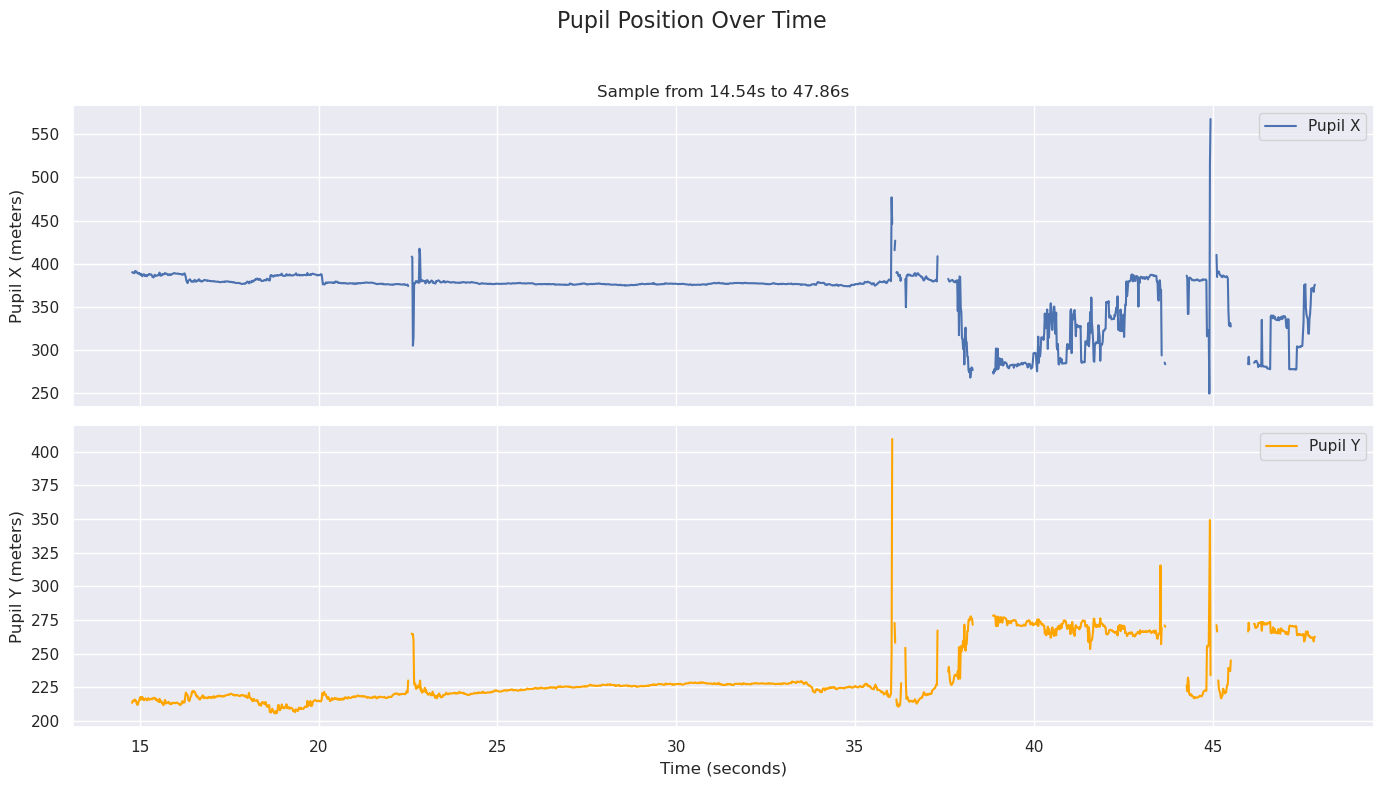


Note: Pupil position data can sometimes contain artifacts, such as sharp spikes due to blinks or temporary tracking loss. The unit 'meters' for pupil position might seem unusual; it likely represents a scaled value and relative changes are more informative.


In [4]:
if nwb and "EyeTracking" in nwb.acquisition and \
   "pupil_tracking" in nwb.acquisition["EyeTracking"].spatial_series:
    
    pupil_tracking_series = nwb.acquisition["EyeTracking"].spatial_series["pupil_tracking"]
    
    data = pupil_tracking_series.data
    timestamps = pupil_tracking_series.timestamps
    
    print(f"Pupil tracking data shape: {data.shape}")
    print(f"Pupil tracking timestamps shape: {timestamps.shape}")

    if data.shape[0] > 0 and timestamps.shape[0] > 0:
        # Select a subset of data to plot (e.g., first 2000 points)
        # Let's try to avoid the very large artifact seen in exploration around 22.5s
        # by selecting a slightly different window or being prepared to comment on it.
        # For now, we'll plot a segment.
        
        start_index = 0
        num_points_to_plot = min(2000, data.shape[0] - start_index) # Ensure we don't go out of bounds
        
        plot_slice = slice(start_index, start_index + num_points_to_plot)

        # Ensure data is loaded into memory for plotting
        pupil_x = data[plot_slice, 0]
        pupil_y = data[plot_slice, 1]
        time_s = timestamps[plot_slice]

        print(f"Plotting {num_points_to_plot} points of pupil tracking data.")

        fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
        fig.suptitle('Pupil Position Over Time', fontsize=16)

        axs[0].plot(time_s, pupil_x, label='Pupil X')
        axs[0].set_ylabel(f'Pupil X ({pupil_tracking_series.unit})')
        axs[0].legend(loc="upper right")
        axs[0].set_title(f'Sample from {time_s[0]:.2f}s to {time_s[-1]:.2f}s')


        axs[1].plot(time_s, pupil_y, label='Pupil Y', color='orange')
        axs[1].set_ylabel(f'Pupil Y ({pupil_tracking_series.unit})')
        axs[1].set_xlabel(f'Time ({pupil_tracking_series.timestamps_unit})')
        axs[1].legend(loc="upper right")

        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
        plt.show()
        
        print("\nNote: Pupil position data can sometimes contain artifacts, such as sharp spikes due to blinks or temporary tracking loss. The unit 'meters' for pupil position might seem unusual; it likely represents a scaled value and relative changes are more informative.")
        
    else:
        print("Pupil tracking data or timestamps are empty or have incompatible shapes.")
else:
    print("Pupil tracking data not found in the NWB file at the expected location or NWB file not loaded.")

### 2. Running Speed

The experiment also recorded the animal's running speed. Let's visualize a segment of this data.

Running speed data shape: (118163,)
Running speed timestamps shape: (118163,)
Plotting 5000 points of running speed data.


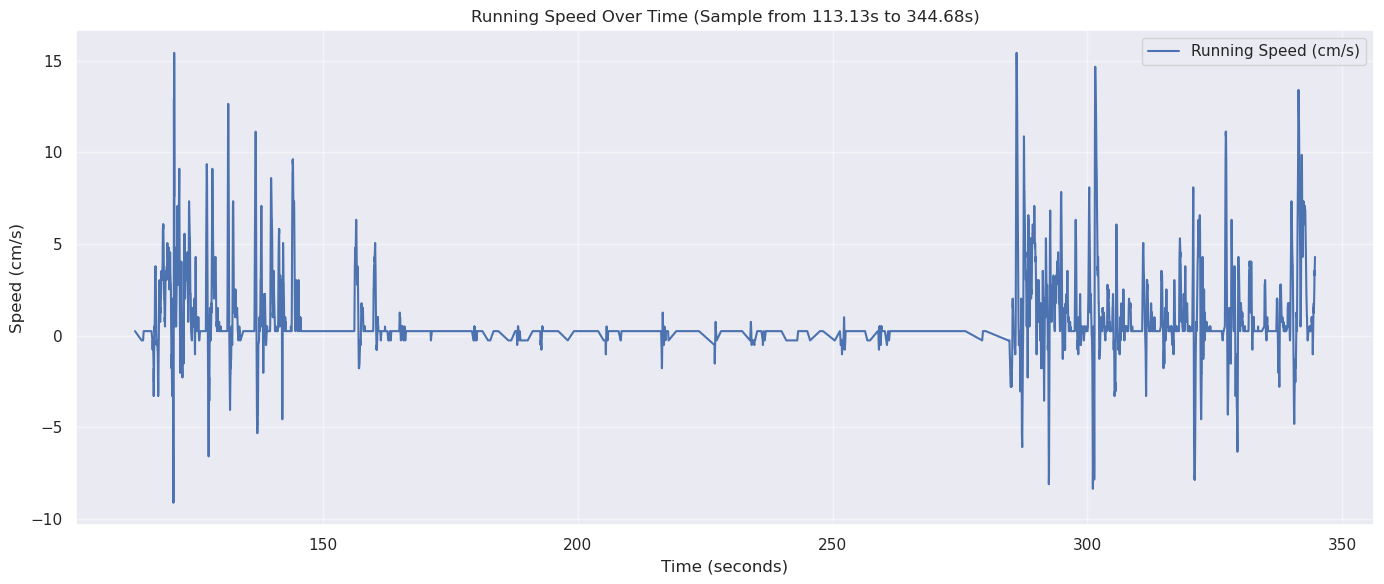


Note: Running speed data shows periods of activity and rest. Negative values might indicate bidirectional movement of the wheel or a characteristic of the sensor/processing.


In [5]:
if nwb and "running" in nwb.processing and \
   "running_speed" in nwb.processing["running"].data_interfaces:
    
    running_speed_series = nwb.processing["running"].data_interfaces["running_speed"]
    
    data_rs = running_speed_series.data
    timestamps_rs = running_speed_series.timestamps

    print(f"Running speed data shape: {data_rs.shape}")
    print(f"Running speed timestamps shape: {timestamps_rs.shape}")

    if data_rs.shape[0] > 0 and timestamps_rs.shape[0] > 0:
        # Select a subset of data to plot (e.g., first 5000 points)
        num_points_to_plot_rs = min(5000, data_rs.shape[0])
        
        speed = data_rs[:num_points_to_plot_rs]
        time_rs = timestamps_rs[:num_points_to_plot_rs]

        print(f"Plotting {num_points_to_plot_rs} points of running speed data.")

        plt.figure(figsize=(14, 6))
        plt.plot(time_rs, speed, label=f'Running Speed ({running_speed_series.unit})')
        plt.ylabel(f'Speed ({running_speed_series.unit})')
        plt.xlabel(f'Time ({running_speed_series.timestamps_unit})')
        plt.title(f'Running Speed Over Time (Sample from {time_rs[0]:.2f}s to {time_rs[-1]:.2f}s)')
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.5)
        plt.tight_layout()
        plt.show()
        
        print("\nNote: Running speed data shows periods of activity and rest. Negative values might indicate bidirectional movement of the wheel or a characteristic of the sensor/processing.")
        
    else:
        print("Running speed data or timestamps are empty.")
else:
    print("Running speed data not found in the NWB file at the expected location or NWB file not loaded.")

### 3. Spike Times Raster Plot

The NWB file contains spike-sorted units. A raster plot is a common way to visualize the firing patterns of multiple neurons over time. We'll plot spikes for a subset of units.

**Note on Raster Plots:** Some units may appear silent or very sparse in the raster plot if they did not fire spikes within the selected time window, or if they are generally low-firing units. The selection of units here is typically the first N units as reported by the NWB file, which may not always be the most active or interesting ones for a given short time window.

Units dataframe loaded with shape: (2764, 29)
Selected first 20 units for raster plot.
Plotting spike times in window: 20.00s - 80.00s.


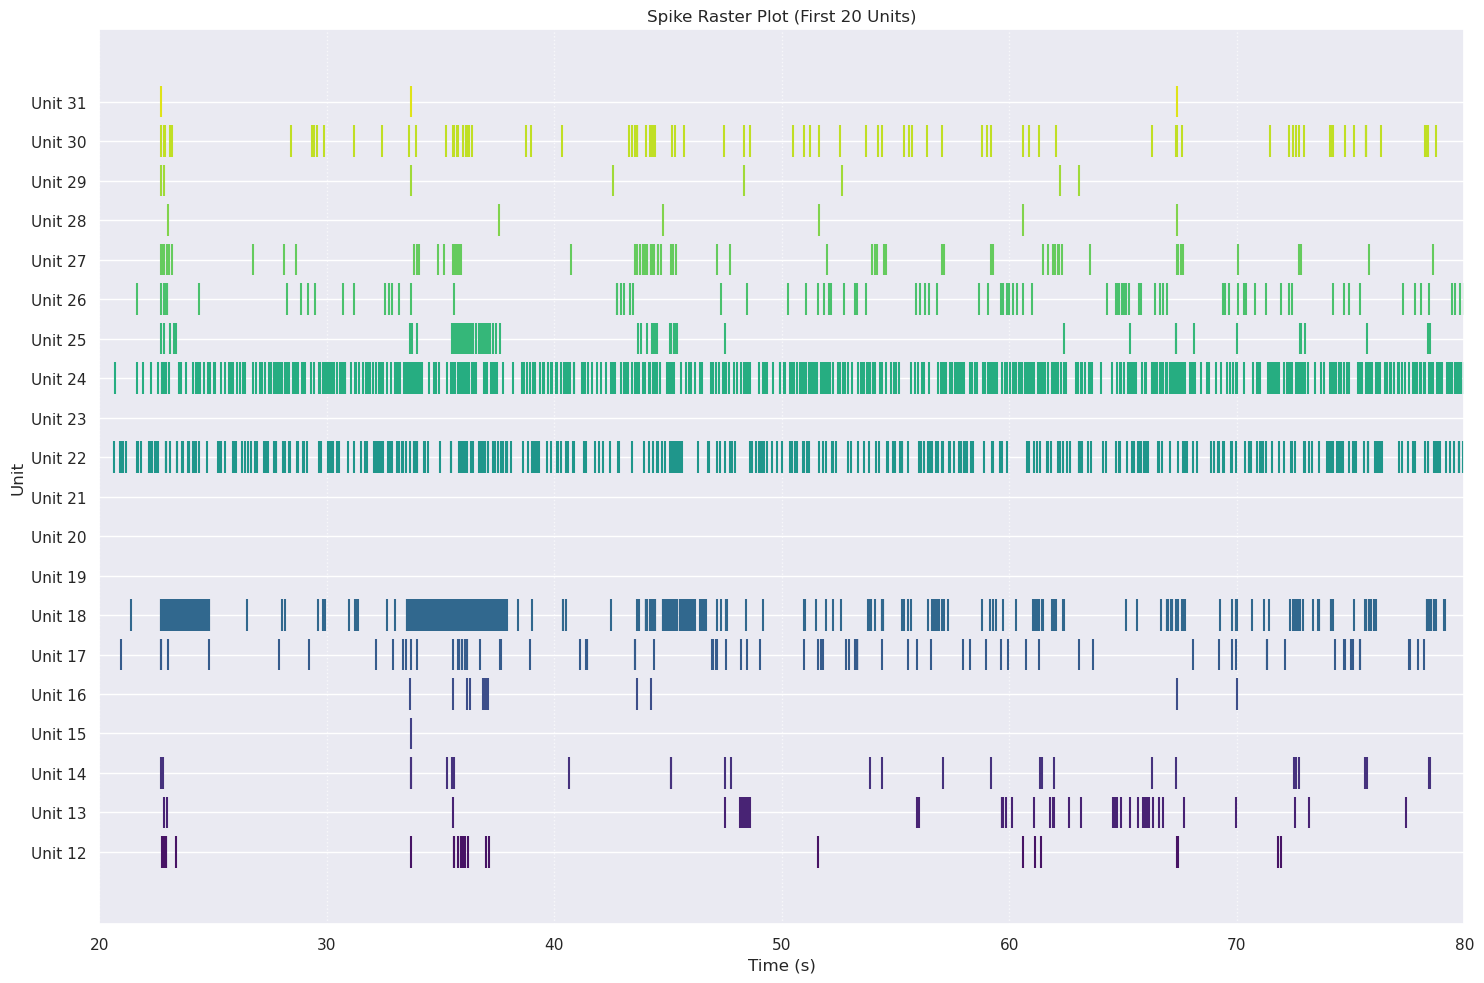

In [6]:
if nwb and nwb.units is not None and len(nwb.units.id[:]) > 0:
    units_df = nwb.units.to_dataframe()
    print(f"Units dataframe loaded with shape: {units_df.shape}")
    
    num_units_to_plot_raster = min(20, len(units_df))
    if num_units_to_plot_raster == 0:
        print("No units to plot.")
    else:
        selected_units_df = units_df.head(num_units_to_plot_raster)
        print(f"Selected first {num_units_to_plot_raster} units for raster plot.")

        # Define a time window for the raster plot
        # Let's try to find a window that corresponds to some stimulus if possible,
        # or default to a segment like 0-60s or a segment with visible activity.
        # For simplicity, let's use a fixed window initially.
        # From exploration, spikes were visible from ~20s onwards.
        plot_time_window_s_raster = (20, 80) # Example: 20 to 80 seconds
        
        # Check if selected units have spikes in this window, adjust if necessary
        all_st = np.concatenate([st for st in selected_units_df["spike_times"] if len(st)>0])
        if len(all_st) > 0:
            min_spike_time_overall = np.min(all_st)
            max_spike_time_overall = np.max(all_st)
            # If our chosen window is entirely outside actual spike times, adjust it
            if plot_time_window_s_raster[1] < min_spike_time_overall or \
               plot_time_window_s_raster[0] > max_spike_time_overall:
                plot_time_window_s_raster = (min_spike_time_overall, min(max_spike_time_overall, min_spike_time_overall + 60))
        
        print(f"Plotting spike times in window: {plot_time_window_s_raster[0]:.2f}s - {plot_time_window_s_raster[1]:.2f}s.")

        plt.figure(figsize=(15, 10))
        
        event_colors_raster = sns.color_palette("viridis", n_colors=num_units_to_plot_raster)
        
        unit_ids_for_plot_raster = selected_units_df.index[:num_units_to_plot_raster]
        
        # Determine y-axis labeling strategy (actual IDs vs. simple indices)
        use_actual_ids_for_y_raster = all(isinstance(uid, (int, np.integer)) for uid in unit_ids_for_plot_raster)
        if use_actual_ids_for_y_raster:
            min_id_rast, max_id_rast = np.min(unit_ids_for_plot_raster), np.max(unit_ids_for_plot_raster)
            if max_id_rast - min_id_rast > num_units_to_plot_raster * 5: # If IDs are too sparse
                use_actual_ids_for_y_raster = False
        
        ytick_locs_raster = []
        ytick_labels_raster = []

        for i, unit_original_id in enumerate(unit_ids_for_plot_raster):
            spike_times_s_unit = selected_units_df.loc[unit_original_id, "spike_times"]
            spikes_in_window_unit = spike_times_s_unit[
                (spike_times_s_unit >= plot_time_window_s_raster[0]) & 
                (spike_times_s_unit <= plot_time_window_s_raster[1])
            ]
            
            y_val_raster = unit_original_id if use_actual_ids_for_y_raster else i
            
            plt.eventplot(
                spikes_in_window_unit, 
                lineoffsets=y_val_raster, 
                linelengths=0.8, 
                colors=[event_colors_raster[i % len(event_colors_raster)]]
            )
            ytick_locs_raster.append(y_val_raster)
            label_text = f"Unit {unit_original_id}"
            if not use_actual_ids_for_y_raster:
                 label_text += f" (idx {i})"
            ytick_labels_raster.append(label_text)

        plt.yticks(ytick_locs_raster, ytick_labels_raster)
        plt.xlabel(f"Time (s)")
        plt.ylabel("Unit")
        plt.title(f"Spike Raster Plot (First {num_units_to_plot_raster} Units)")
        plt.xlim(plot_time_window_s_raster)
        plt.grid(True, axis='x', linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.show()
else:
    print("Units data not found or is empty in the NWB file, or NWB file not loaded.")

### 4. Accessing Unit Quality Metrics

The `nwb.units` table often contains quality metrics for each sorted unit. Let's display a few of these metrics for the units we plotted in the raster.

In [7]:
if nwb and nwb.units is not None and len(nwb.units.id[:]) > 0:
    units_df_quality = nwb.units.to_dataframe()
    num_units_shown_raster = min(20, len(units_df_quality)) # Should match raster plot
    selected_units_for_quality = units_df_quality.head(num_units_shown_raster)

    # Columns to display - these are examples, actual column names might vary slightly or not all exist
    # Common quality metrics were listed in the nwb-file-info output for nwb.units
    quality_metrics_to_show = [
        'isi_violations', # Rate of inter-spike interval violations
        'snr',            # Signal-to-noise ratio
        'presence_ratio', # Fraction of experiment time the unit was present
        'firing_rate',    # Average firing rate
        'quality'         # Overall quality score/label (e.g., 'good', 'mua')
    ]
    
    # Filter to existing columns in the dataframe
    existing_quality_metrics = [col for col in quality_metrics_to_show if col in selected_units_for_quality.columns]
    
    if existing_quality_metrics:
        print(f"\n--- Quality Metrics for the first {num_units_shown_raster} units ---")
        quality_df_subset = selected_units_for_quality[existing_quality_metrics]
        try:
            from IPython.display import display
            display(quality_df_subset)
        except ImportError:
            print(quality_df_subset.to_string())
    else:
        print("Could not find the example quality metric columns in the units table.")
        print(f"Available columns in units table: {list(units_df_quality.columns)}")
        
else:
    print("Units data not found, cannot display quality metrics.")


--- Quality Metrics for the first 20 units ---


,isi_violations,snr,presence_ratio,firing_rate,quality
id,,,,,
12,1.224279,2.713103,0.99,1.992914,good
13,0.100634,4.435071,0.99,1.516987,good
14,2.528098,2.236984,0.99,0.703265,good
15,20.360357,2.293410,0.89,0.047692,good
16,0.078791,2.292777,0.99,0.766648,good
17,0.046559,3.844790,0.99,1.727398,good
18,0.054798,2.835290,0.99,28.778887,good
19,0.000000,3.698435,0.23,0.192743,good
20,0.021996,1.877844,0.93,3.554133,good


## Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI Archive and retrieve Dandiset metadata and asset lists.
- Load a specific NWB file from Dandiset 000690 using its URL for remote streaming.
- Access basic metadata from the NWB file.
- Point to Neurosift for interactive exploration.
- Visualize example data:
    - Pupil X and Y positions over time.
    - Animal running speed.
    - Spike times for a subset of neurons using a raster plot.

### Potential Future Directions:

1.  **Correlate Neural Activity with Behavior:** Analyze spike rates or patterns in relation to running speed or specific pupil dynamics (e.g., dilation during certain events).
2.  **Stimulus-Evoked Responses:** The NWB file contains rich information in `nwb.intervals` detailing various visual stimulus presentations. One could align neural activity (spike times, LFP) to the onset of specific stimuli (e.g., "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations") to investigate neural tuning. This would involve extracting stimulus times from the `TimeIntervals` tables and creating peri-stimulus time histograms (PSTHs) or other event-related analyses.
3.  **Explore Different NWB Files:** This Dandiset contains multiple NWB files, including those specific to imaging (`_image.nwb`) or individual ecephys probes (`_probe-X_ecephys.nwb`). Exploring these could provide deeper insights into specific data modalities. For instance, `_ecephys.nwb` files might contain LFP data that could be analyzed.
4.  **Advanced Visualizations:** Create more complex plots, such as plotting average spike waveforms for selected units, or comparing neural responses across different stimulus conditions.
5.  **Population Analysis:** Investigate correlations in firing patterns across the neuronal population or dimensional reduction techniques to understand population coding.

Remember to consult the Dandiset's description and related publications for more context on the experimental design and intended analyses.

---
End of Notebook

In [8]:
# Explicitly close resources. This cell should be the last one executed if NWB file was used.
print("Attempting to clean up NWB file resources...")
try:
    if 'io_nwb' in globals() and io_nwb is not None:
        io_nwb.close()
        print("NWBHDF5IO (io_nwb) closed.")
    if 'h5_file_obj' in globals() and h5_file_obj is not None:
        # h5py.File might be closed by NWBHDF5IO, but explicit close is safer if we opened it.
        # However, NWBHDF5IO does not take ownership for closing a file object passed to it.
        h5_file_obj.close()
        print("HDF5 file object (h5_file_obj) closed.")
    if 'remote_nwb_file_obj' in globals() and remote_nwb_file_obj is not None:
        remote_nwb_file_obj.close()
        print("Remote file object (remote_nwb_file_obj) closed.")
    if 'nwb' in globals():
        del nwb # Remove reference to the NWB object
        print("NWB object reference deleted.")
except Exception as e:
    print(f"Error during NWB file resource cleanup: {e}")

print("Notebook cleanup cell finished.")

Attempting to clean up NWB file resources...
NWBHDF5IO (io_nwb) closed.
HDF5 file object (h5_file_obj) closed.
Remote file object (remote_nwb_file_obj) closed.
NWB object reference deleted.
Notebook cleanup cell finished.
